In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor # can remove
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
easyshare = pd.read_stata('data/sharewX_rel8-0-0_easySHARE_stata/easySHARE_rel8-0-0.dta')

illness_before = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_before_module_v01.dta")
illness_during = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_during_module_v01.dta")
job = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/job_module_v01.dta")
life = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/life_module_v01.dta")
young_age = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/young_age_module_v01.dta")
yearly = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/yearly_module_v01.dta")
# individual_year = pd.read_stata(\"data/SHARE-ENV - Exposure to Environmental Hazards/individual_year_panel_v01.dta\")  NB times out, I ran it for 2+hrs,

df = pd.merge(easyshare, life, on=['mergeid', 'wave'], how='left')
#merged.to_pickle(\"data/df_merged.pkl\"

In [3]:
df.describe()

,wave,wavepart,thinc_m,CDD_w,HDD_w,avg_conc_no2_mean,avg_conc_no2_median,avg_conc_pm10_mean,avg_conc_pm10_median,avg_conc_pm10_w,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
count,412110.000000,4.121100e+05,4.121100e+05,247129.000000,247129.000000,292308.000000,292308.000000,292308.000000,292308.000000,292330.000000,...,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,2.471290e+05,247129.000000,247129.000000
mean,5.035566,9.878451e+05,8.085985e+05,94.902377,2596.399453,8.706448,8.741836,19.625999,19.680202,20.533115,...,20.089201,24.628500,27.599796,22.380423,8.054352,3.336129,1.804966,3.452446e+02,7.374281,344.103359
std,2.084000,3.082496e+06,8.591778e+07,128.238707,924.667334,4.113525,4.223277,7.740365,7.827475,8.009752,...,12.918813,12.961193,11.655237,22.909128,7.874637,4.334907,4.329533,8.828877e-10,6.691680,4.119086
min,1.000000,1.000000e+00,-9.972739e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.452446e+02,-9.596973,328.414221
25%,4.000000,7.800000e+01,1.027684e+03,8.004644,2011.427361,5.823186,5.824138,14.328774,14.446408,15.433441,...,8.858876,16.532478,21.304916,4.366660,0.662412,0.023839,0.000000,3.452446e+02,1.995656,345.244644
50%,5.000000,4.567000e+03,1.582463e+04,34.827944,2783.924889,8.341747,8.352927,19.762360,19.834177,20.298185,...,22.411585,27.590120,28.420017,13.743146,5.847452,1.070523,0.031710,3.452446e+02,6.422247,345.244644
75%,7.000000,4.567800e+04,3.137558e+04,138.272718,3192.298788,11.386459,11.388282,24.509069,24.615608,25.254732,...,29.275328,32.789524,35.428135,36.778969,13.796133,6.220437,1.781571,3.452446e+02,12.631802,345.244644
max,8.000000,1.234568e+07,9.592648e+09,607.820175,5830.370983,20.133627,20.981754,49.492981,51.762325,55.629631,...,67.147392,63.949547,65.836136,131.609512,44.050232,28.332399,47.900356,3.452446e+02,25.564817,345.244644


In [4]:
df.columns

Index(['mergeid', 'hhid', 'coupleid', 'wave', 'wavepart', 'int_version',
       'int_year', 'int_month', 'country', 'country_mod',
       ...
       'tx_2p5_5_w', 'tx_5_7p5_w', 'tx_7p5_10_w', 'tx_g30_w', 'tx_neg2p5_0_w',
       'tx_neg5_neg2p5_w', 'tx_neg5_w', 'warm_o3_w', 'winter_w',
       'yearly_o3_w'],
      dtype='object', length=332)

In [5]:
df.head()

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
0,AT-000327-01,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-000327-02,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
4,AT-000674-01,AT-000674-A,,4,456,0. Baseline questionnaire,2011,11. November,11. Austria,40. Austria,...,28.303789,27.970161,24.312283,12.823309,15.045419,7.444062,0.418507,345.244644,-0.185899,345.244644


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412110 entries, 0 to 412109
Columns: 332 entries, mergeid to yearly_o3_w
dtypes: category(102), float32(202), float64(21), int32(1), int8(1), object(5)
memory usage: 444.0+ MB


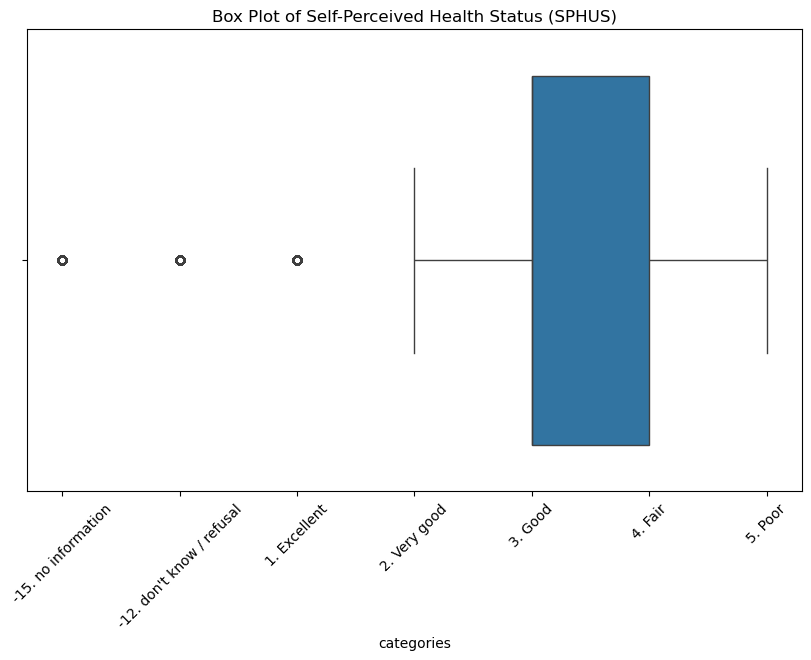

In [7]:
# box plot - doesn't make sense to do boxplot??
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sphus'])
plt.title('Box Plot of Self-Perceived Health Status (SPHUS)')
plt.xlabel('categories')
plt.xticks(rotation=45)
plt.show()

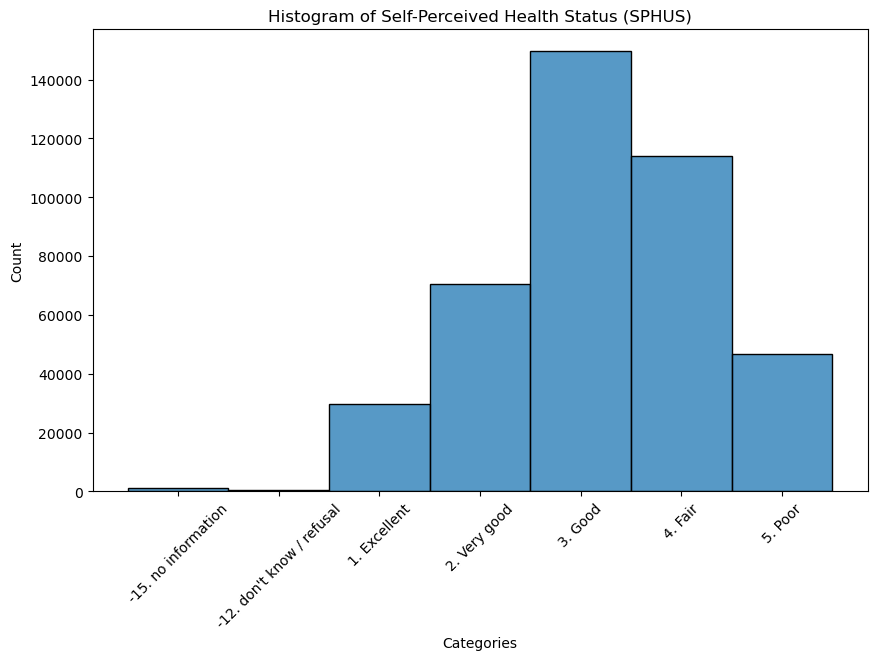

In [8]:
# histo
plt.figure(figsize=(10, 6))
sns.histplot(df['sphus'], discrete=True)
plt.title('Histogram of Self-Perceived Health Status (SPHUS)')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

In [9]:
observations_per_wave = df['wave'].value_counts()
print(observations_per_wave)

wave
7    77202
6    68085
5    66065
4    58000
8    46733
2    37143
1    30419
3    28463
Name: count, dtype: int64


In [10]:
df_sorted = df.sort_values(by=['mergeid', 'wave'], ascending=[True, False])
df_most_recent_wave_per_mergeid = df_sorted.drop_duplicates(subset='mergeid', keep='first')

In [11]:
df_most_recent_wave_per_mergeid

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
6,AT-000674-01,AT-000674-A,,6,456,1. Longitudinal questionnaire,2015,6. June,11. Austria,40. Austria,...,34.005589,31.472639,35.184925,36.778969,4.499215,0.168908,0.001749,345.244644,-0.222259,345.244644
11,AT-001215-01,AT-001215-A,,8,45678,1. Longitudinal questionnaire,2020,1. January,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AT-001492-01,AT-001492-A,AT-001492-01-02,8,45678,1. Longitudinal questionnaire,2020,2. February,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412103,SK-995042-01,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412105,SK-995042-02,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412107,SK-996004-01,SK-996004-A,,8,78,0. Baseline questionnaire,2020,2. February,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412108,SK-999958-01,SK-999958-A,SK-999958-01-02,7,7,0. Baseline questionnaire,2017,8. August,63. Slovakia,703. Slovakia,...,22.639585,23.258799,21.059399,36.957790,9.795322,9.315717,6.441623,345.244644,15.017466,345.244644


# check for NAs

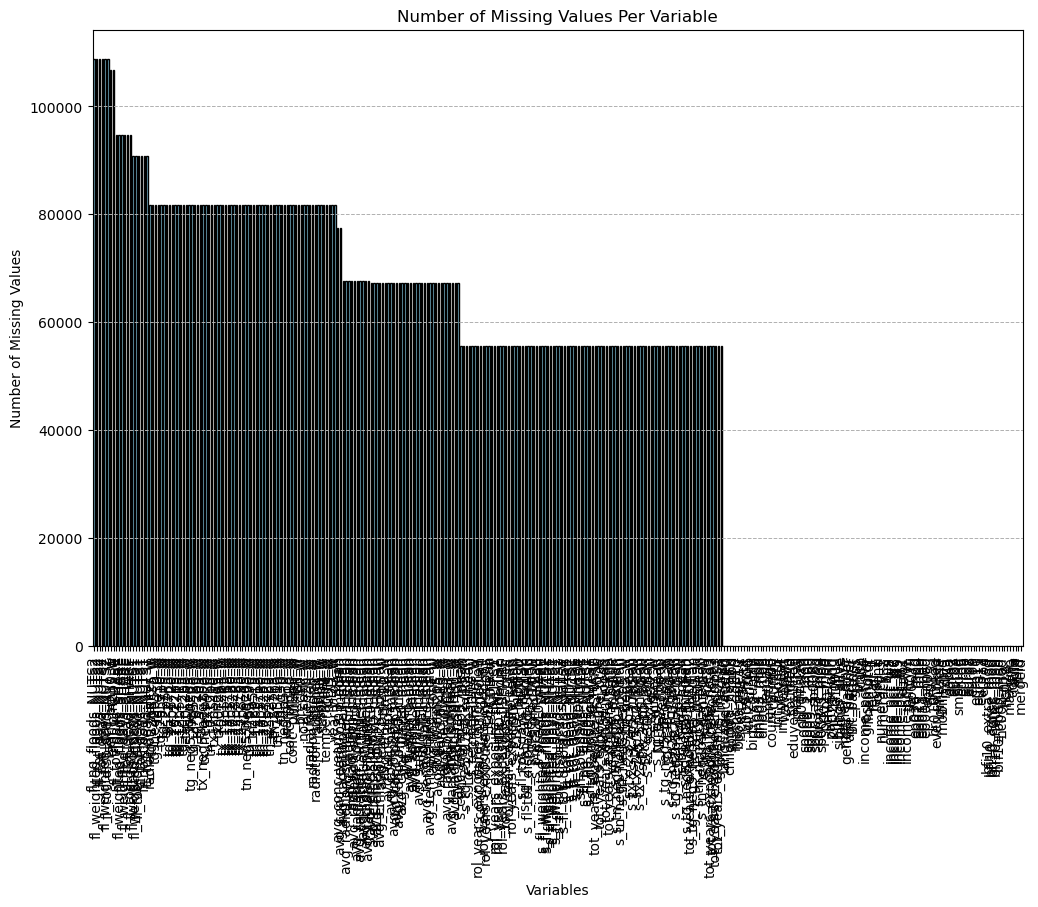

In [83]:
na_counts = df_most_recent_wave_per_mergeid.isna().sum()

na_counts_sorted = na_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
na_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Missing Values Per Variable')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()



In [17]:
#NEW
# dropping those variables lacking greate chunks of data
columns_to_drop = na_counts[na_counts < 2000].index
columns_to_drop = columns_to_drop.drop('sphus')

df_dropped = df.drop(columns=columns_to_drop)

shape_of_dataframe_full = df_most_recent_wave_per_mergeid.shape
shape_of_dataframe_dropped = df_dropped.shape

print(f"No. of samples: {shape_of_dataframe_full[0]}")
print(f"No. of columns (full): {shape_of_dataframe_full[1]}")
print(f"No. of columns (dropped): {shape_of_dataframe_dropped[1]}")

No. of samples: 140125
No. of columns (full): 332
No. of columns (dropped): 226


im not sure if we need to specify how we handle the rest of the NAs - if we just drop all  the observsations which have NAs, then we are going to loose ALOT of observations????

# One Hot Encoding

In [54]:
# rename sphus values as just the give numbers 
df_dropped['sphus'] = df_dropped['sphus'].str.extract(r'(-?\d+)').astype(float)

In [55]:
categorical_columns = df_dropped.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)
for col in categorical_columns:
    print(f"{col} has {df_dropped[col].nunique()} unique values.")

df_encoded = pd.get_dummies(df_dropped, columns=categorical_columns)
df_encoded.shape # nb now we have more columns (about 300 more given number of unique values, and rows (why more rows? also why so many more columns)


Index(['year_life_module', 'NUTS1_floods', 'NUTS2_floods'], dtype='object')
year_life_module has 14 unique values.
NUTS1_floods has 96 unique values.
NUTS2_floods has 203 unique values.


(412110, 536)

come back to this - for the moment i'm going to just drop the categorical columns (except outcome var), but come back to work out what's going wrong above and include them.

In [57]:
# temporary: dropping categorical variables
df_categ_drop = df_dropped.drop(columns=categorical_columns)


# Split data

In [62]:
# Define features and target
X = df_categ_drop.drop('sphus', axis=1)  # Predictor variables
y = df_categ_drop['sphus']  # Outcome variable

# Order Features by Number of NAs
X = X.loc[:, X.isnull().sum().sort_values().index] # need to do this BEFORE impute values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data

In [78]:
# Normalize the data
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline = make_pipeline(imputer, scaler)
X_train_scaled = pipeline.fit_transform(X_train) # THIS AND LINE BELOW HAVE TO GET MOVED INTO FITTING LOOP AS CANOT RUN ILOC ON NUMPY ARRAY
X_test_scaled = pipeline.transform(X_test) 

# Fitting & Feature Selection

In [76]:
rf_limitted = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5) # later come back and try different parameters, but for now  use simple models to test for feature selection (otherwise it takes ages to run)


# Feature counts to evaluate
feature_counts = [50, 100, 150, 200, X_train.shape[1]]  # The last one is to use all features

results = {} # store the average accuracy for each feature count NEED TO OPERATIONALISE

for count in feature_counts:
    # Select the first N features
    X_train_subset = X_train.iloc[:, :count]
    X_test_subset = X_test.iloc[:, :count]

    # Apply imputation and scaling to these subsets
    X_train_scaled_subset = pipeline.fit_transform(X_train_subset) # is this probelmatic:???? is it meaning each subset has different scaling / normalization???
    X_test_scaled_subset = pipeline.transform(X_test_subset)
    
    # Evaluate the model
    scores = cross_val_score(rf_limitted, X_train_scaled_subset, y_train, cv=5, scoring='accuracy') 
    print(f"Average accuracy with top {count} features: {np.mean(scores):.4f}")



Average accuracy with top 50 features: 0.3745
Average accuracy with top 100 features: 0.3753
Average accuracy with top 150 features: 0.3742
Average accuracy with top 200 features: 0.3739
Average accuracy with top 222 features: 0.3740


Best accuracy achieved with 100 features. But this doesn't tell us about which ones are important

In [79]:
rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

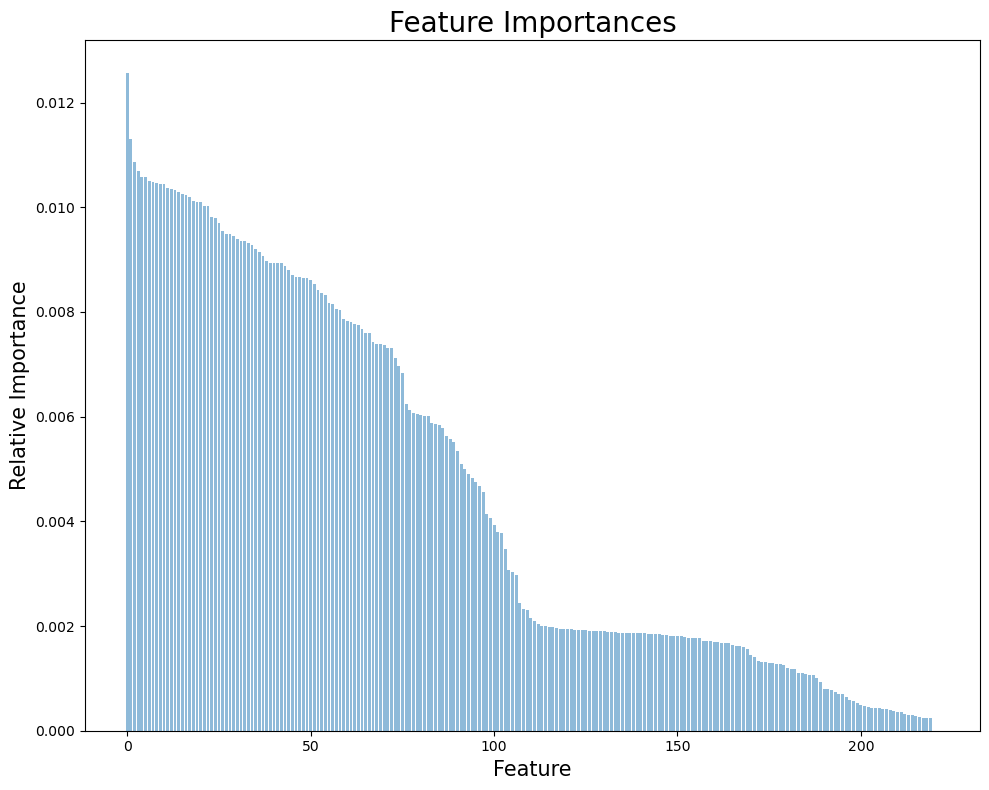

In [82]:
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Can similarly see a drop ~100 var where importance drops quickly

In [98]:
top_100_indices = sorted_indices[:100]

X_train_top_100 = X_train_scaled[:, top_100_indices]

# Convert indices to column names
top_100_feature_names = X_train.columns[top_100_indices]

rf_top_100 = RandomForestClassifier(random_state=42)

rf_top_100.fit(X_train_top_100, y_train)

# Assuming `rf` is your fitted RandomForestClassifier instance
rf_parameters = rf_top_100.get_params()

for param, value in rf_parameters.items():
    print(f"The parameter '{param}' is set to {value}.")

The parameter 'bootstrap' is set to True.
The parameter 'ccp_alpha' is set to 0.0.
The parameter 'class_weight' is set to None.
The parameter 'criterion' is set to gini.
The parameter 'max_depth' is set to None.
The parameter 'max_features' is set to sqrt.
The parameter 'max_leaf_nodes' is set to None.
The parameter 'max_samples' is set to None.
The parameter 'min_impurity_decrease' is set to 0.0.
The parameter 'min_samples_leaf' is set to 1.
The parameter 'min_samples_split' is set to 2.
The parameter 'min_weight_fraction_leaf' is set to 0.0.
The parameter 'n_estimators' is set to 100.
The parameter 'n_jobs' is set to None.
The parameter 'oob_score' is set to False.
The parameter 'random_state' is set to 42.
The parameter 'verbose' is set to 0.
The parameter 'warm_start' is set to False.


In [99]:
# i ran for 20 mins - it works, just needs time

# Grid search for hyperparameter tuning
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#}

#cv_rf = GridSearchCV(estimator=rf_top_100, param_grid=param_grid, cv=5)
#cv_rf.fit(X_train_top_100, y_train) 
#cv_rf is the model after GridSearchCV 
#has found the best parameters and refitted the model using these parameters on the entire training set

# Best parameters
#print("Best parameters:", cv_rf.best_params_)



KeyboardInterrupt: 